In [1]:
import pandas as pd
from datetime import datetime
from time import time
from utils import *

In [2]:
PATH_DATA = './../../data/'
PATH_PQRQUET= 'parquet/'
FILE_20 = 'quotes-2020.json.bz2'
FILE_PARQUET = 'speaker_attributes.parquet'
FILE_QID_QB = 'wikidata_labels_descriptions_quotebank.csv.bz2'
CHUNK_SIZE = 1e5

In [3]:
# Quotes processing for 2020:
df_20 = pd.read_json(PATH_DATA+FILE_20, lines=True, compression='bz2', chunksize=CHUNK_SIZE)
# | quoteID | qotation | speaker | qids | date | numOccurrences | probas | urls | phase |
for chunk in df_20:
    df_0 = chunk
    break
df_0.sample(8)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
93069,2020-04-06-018164,I Miss Going To Shows!,None,[],2020-04-06 10:26:34,12,"[[None, 0.6222], [Robin Murray, 0.3481], [Riz ...",[https://www.clashmusic.com/features/i-miss-go...,E
29184,2020-03-19-043064,Ken and others are exhibiting extraordinary ci...,Ken Griffin,[Q56253798],2020-03-19 17:13:45,1,"[[Ken Griffin, 0.678], [None, 0.322]]",[http://www.chicagobusiness.com/government/lig...,E
37019,2020-02-12-070252,Our leadership is about winning the maximum nu...,Leo Varadkar,[Q1728820],2020-02-12 15:57:44,1,"[[Leo Varadkar, 0.4755], [None, 0.3834], [Bren...",[https://www.irishmirror.ie/news/irish-news/po...,E
79450,2020-01-05-046084,With competing demands over limited public res...,Raneo Abu,[Q16197189],2020-01-05 19:11:35,1,"[[Raneo Abu, 0.5854], [None, 0.3935], [Isidro ...",[http://journal.com.ph/news/nation/duterte-set...,E
43945,2020-02-25-022818,"I feel like, throughout my illness, I've defin...",Bebe Rexha,[Q16185856],2020-02-25 16:22:34,1,"[[Bebe Rexha, 0.8128], [None, 0.1872]]",[http://www.glamourmagazine.co.uk/article/bebe...,E
69309,2020-01-05-003515,attempt (ing) it.,Vladimir Putin,[Q7747],2020-01-05 14:56:20,1,"[[Vladimir Putin, 0.425], [None, 0.3341], [Ser...",[https://www.globalresearch.ca/counterproducti...,E
12889,2020-01-04-004977,But this is about winning and losing. And we'r...,David Quinn,"[Q23417062, Q38327794, Q5238783, Q5238784, Q52...",2020-01-04 01:11:24,1,"[[David Quinn, 0.871], [None, 0.129]]",[https://www.newsday.com/sports/hockey/rangers...,E
19127,2020-02-26-054630,"practices, customs, policies and laws that are...",Natalia Molina,[Q16751560],2020-02-26 19:35:37,2,"[[Natalia Molina, 0.8648], [None, 0.1352]]",[https://dailynorthwestern.com/2020/02/26/late...,E


In [4]:
# Load Writers' MetaData
begin = time()
df_parquet = pd.read_parquet(PATH_DATA+PATH_PQRQUET+FILE_PARQUET)
# | aliases | date_of_bitrh | nationality | gender | lastrevid | ethnic_group | US_congress_bio_ID | occupation | party | academic_degree | id | label | candidacy | type | religion |
print(f'load parquet file in : {(time()-begin):.2f} [s]')

load parquet file in : 16.92 [s]


In [5]:
print(f'parquet file shape   : {df_parquet.shape}\n'\
      f'are ids unique ?     : {df_parquet.id.nunique()==df_parquet.shape[0]}\n'\
      f'{"-"*30}\n'\
      'count:\n',\
      df_parquet.count())

parquet file shape   : (9055981, 15)
are ids unique ?     : True
------------------------------
count:
 aliases               1203402
date_of_birth         5017333
nationality           3715852
gender                7105600
lastrevid             9055981
ethnic_group           130385
US_congress_bio_ID      12874
occupation            6373084
party                  399176
academic_degree         99995
id                    9055981
label                 8543681
candidacy               65442
type                  9055981
religion               196284
dtype: int64


In [6]:
df_parquet.sample(8)

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
5646500,None,[+1920-02-27T00:00:00Z],None,[Q6581097],1371893439,None,None,None,None,None,Q105527592,Robert Kraus,None,item,None
3259528,None,None,None,None,1389927833,None,None,None,None,None,Q97207671,None,None,item,None
3963521,None,None,None,None,1350657775,None,None,[Q1650915],None,None,Q57018714,Antonino Belfiore,None,item,None
6703179,None,None,None,[Q6581097],1318281421,None,None,[Q3665646],None,None,Q100872907,John Kraljic,None,item,None
8301450,[Clement Mary],[+1991-12-13T00:00:00Z],[Q142],[Q6581097],1391701041,None,None,[Q2309784],None,None,Q21705215,Clément Mary,None,item,None
2688959,[Leonard Francis Comber],[+1921-01-01T00:00:00Z],"[Q145, Q833]",[Q6581097],1390264688,None,None,[Q2516866],None,None,Q28864829,Leon Comber,None,item,None
7411736,None,None,None,[Q6581097],1367186619,None,None,[Q2526255],None,None,Q61818981,Behrouz Rae,None,item,None
2942597,[Mäkelä M],None,None,None,1396665985,None,None,[Q1650915],None,None,Q67984401,Marjukka Mäkelä,None,item,None


In [7]:
# Load QID Description
df_qid = pd.read_csv(PATH_DATA+PATH_PQRQUET+FILE_QID_QB, compression='bz2')
# | QID | Label | Description |
print(df_qid.describe())

             QID             Label      Description
count      36969             32951            24542
unique     36969             31462            17029
top     Q6104047  Democratic Party  political party
freq           1                45             1113


In [8]:
df_qid.sample(8)

,QID,Label,Description
35946,Q29379612,Municipal elections 2017 in Haapajärvi in Finland,NaN
19991,Q1551855,Founder,Wikimedia disambiguation page
25305,Q4057849,admiral,naval rank of the United States
18898,Q106039,Christian,person who adheres to Christianity
18006,Q60394138,NaN,NaN
30977,Q18913555,Joint List,electoral alliance of three Arab-dominated Isr...
23662,Q276258,childhood,sociological term describing human age from bi...
21049,Q6150829,Janata Dal (Ajit),political party of India


In [9]:
# Writers with gender:
df_parquet_gender_noNa = df_parquet.dropna(subset=['gender'])

# Unique gender's qid in writers data:
unik_gender_id, unik_writer_index = get_unique_list(df_parquet_gender_noNa.gender)
writers_gender_qid = pd.DataFrame(unik_gender_id, columns=['qids']) # sometimes, there is many genders for a writer -> consider all of them

# Gender of writer that are in parquet file
df_gender = df_qid[df_qid.QID.isin(writers_gender_qid.qids)]

# Gender of writer that are NOT in parquet file
df_gender_ko = writers_gender_qid[-writers_gender_qid.qids.isin(df_gender.QID)]

In [10]:
gender_names, gender_qids, writer_qids, gender_description = [], [], [], []
count_not_rep = 0
for i in unik_writer_index:
    for j in df_parquet_gender_noNa.gender.iloc[i]:
        writer_qids.append(df_parquet_gender_noNa.id.iloc[i])
        gender_qids.append(j)
        gender_name = df_qid[df_qid.QID == j].Label.values
        if len(gender_name)>0:
            gender_names.append(gender_name[0])
            gender_description.append(df_qid[df_qid.QID == j].Description.values[0])
        else:
            count_not_rep += 1
            gender_names.append(f'--> Not repertiored [{count_not_rep}] ???')
            gender_description.append('-')

df_gender_firstWriter = pd.DataFrame({'gender_names':gender_names, 'gender_qids':gender_qids, 'writer_qids':writer_qids, 'description': gender_description})\
                        .groupby('gender_names').agg('first')
df_gender_firstWriter

,gender_qids,writer_qids,description
gender_names,,,
--> Not repertiored [1] ???,Q15145782,Q78971059,-
--> Not repertiored [2] ???,Q15145783,Q2078379,-
Erkek,Q106299064,Q106375776,family name
Gorō,Q8964773,Q1515301,male given name
Taira no Kiyomori,Q281833,Q710537,Japanese samurai (1118-1181)
X-gender,Q96000630,Q2336456,a third gender or non-binary gender identity t...
agender,Q505371,Q4754807,absence of a gender identity
androgyny,Q207959,Q66283650,combination of male and female traits
assigned female at birth,Q99485785,Q492190,gender identity assigned at birth


In [11]:
# Quotes processing for 2020:
df_20 = pd.read_json(PATH_DATA+FILE_20, lines=True, compression='bz2', chunksize=CHUNK_SIZE)
# | quoteID | qotation | speaker | qids | date | numOccurrences | probas | urls | phase |

In [12]:
count_men      = 0    # known writer : men
count_women    = 0    # known writer : women
count_others   = 0    # known writer : other
count_noInfo   = 0    # known writer : no info about sex
count_wNoMeta  = 0    # known writer : no meta about writer
count_wunknown = 0    # unknown writer
count_all      = 0    # all writers

# list of Genders qid
qid_male    = [df_gender_firstWriter.loc['male'].gender_qids]
qid_female  = [df_gender_firstWriter.loc['female'].gender_qids]
qids_others = df_gender_firstWriter.drop(['male', 'female'])[['gender_qids']].gender_qids

# DataFrame to record weekly quotations per genders
col      = ['male', 'female', 'others', 'noInfo', 'writer_noMeta', 'writer_unknown', 'all']
index    = [i for i in range(1, 54)]
df_count = pd.DataFrame(0, index=index, columns=col)

# DataFrame to record missing qids informations
writer_noMeta = pd.DataFrame()

begin = time()
for i, chunk in enumerate(df_20):
    chunk_time = time()
    
    chunk['week']  = get_week(chunk, 'quoteID')
    
    #_____
    # ALL
    #`````
    count_all += chunk.shape[0]
    df_count['all'] = df_count['all'].add(chunk.week.value_counts(), fill_value=0)

    #________________
    # WRITER UNKNOWN
    #````````````````
    # Known writers ID - only the 1st one --> if 1st is [None]: not keept
    #                                     --> if there is homonyms: keep only the first one
    #                                         (as we only have interest in gender, we assume that the true writer and its homonym have the same one)
    q_is_writer_known      = chunk.qids.apply(lambda x: bool(x))
    q_writer_known         = chunk[['week']][ q_is_writer_known]
    q_writer_unknown       = chunk[['week']][-q_is_writer_known]
    q_writer_known['qids'] = chunk[q_is_writer_known].qids.apply(lambda x: x[0])
    
    df_count.writer_unknown = df_count.writer_unknown.add(q_writer_unknown.week.value_counts(), fill_value=0)
    count_wunknown += chunk.shape[0]-q_writer_known.shape[0]
    
    #________________
    # WRITER NO META
    #````````````````
    m_is_writer_known = df_parquet.id.isin(q_writer_known.qids)
    m_writer_known    = df_parquet[m_is_writer_known][['gender', 'id']]
    
    q_is_writer_meta       = q_writer_known.qids.isin(m_writer_known.id)
    q_writer_known_no_meta = q_writer_known[-q_is_writer_meta]
    q_writer_known_meta    = q_writer_known[ q_is_writer_meta]
    
    df_count.writer_noMeta = df_count.writer_noMeta.add(q_writer_known_no_meta.week.value_counts(), fill_value=0)
    count_wNoMeta += q_writer_known.shape[0]-q_writer_known_meta.shape[0]
    
    # ID of known writers without info
    writer_noMeta = writer_noMeta.append(q_writer_known_no_meta[['qids']].drop_duplicates())
    
    #________________
    # GENDER NO INFO
    #````````````````
    m_is_gender_na = m_writer_known.gender.isna()
    m_gender_known = m_writer_known[-m_is_gender_na]
    q_is_gender_meta = q_writer_known_meta.qids.isin(m_gender_known.id)
    q_gender_no_meta = q_writer_known_meta[-q_is_gender_meta]
    q_gender_meta    = q_writer_known_meta[ q_is_gender_meta]
    
    df_count.noInfo = df_count.noInfo.add(q_gender_no_meta.week.value_counts(), fill_value=0)
    count_noInfo += q_writer_known_meta.shape[0]-q_gender_meta.shape[0]
    
    #________________________
    # MALE - FEMALE - OTHERS
    #````````````````````````
    # Gender Count : if two gender: Only the 1st one count, not the others   
    m_is_male    = m_gender_known[m_gender_known.gender.apply(lambda x: x[0]).isin(qid_male)]
    m_is_female  = m_gender_known[m_gender_known.gender.apply(lambda x: x[0]).isin(qid_female)]
    m_is_others  = m_gender_known[m_gender_known.gender.apply(lambda x: x[0]).isin(qids_others)]
    
    q_gender_meta_male   = q_gender_meta[q_gender_meta.qids.isin(m_is_male.id)]
    q_gender_meta_female = q_gender_meta[q_gender_meta.qids.isin(m_is_female.id)]
    q_gender_meta_others = q_gender_meta[q_gender_meta.qids.isin(m_is_others.id)]
    
    df_count.male   = df_count.male.add(q_gender_meta_male.week.value_counts(), fill_value=0)
    df_count.female = df_count.female.add(q_gender_meta_female.week.value_counts(), fill_value=0)
    df_count.others = df_count.others.add(q_gender_meta_others.week.value_counts(), fill_value=0)
    count_men    += q_gender_meta_male.shape[0]
    count_women  += q_gender_meta_female.shape[0]
    count_others += q_gender_meta_others.shape[0]
    
    print(f'chunk {i+1} have been processed in {(time()-chunk_time):.2f} [s]')
       
    ## Uncomment to process the 1st [k+1] chunk
    #k = 1
    #if i == k:
    #    break
    
print(f'total time: {(time() - begin)//60} [min] and {(time()-begin)%60:.2f} [s]')

#_____________
# TOTAL COUNT
#`````````````
df_count.loc['sum'] = df_count.sum()
df_count = df_count.astype(int)

# might have same unknown in different chunk
writer_noMeta = writer_noMeta.drop_duplicates()

chunk 1 have been processed in 1.33 [s]
chunk 2 have been processed in 1.09 [s]
chunk 3 have been processed in 2.41 [s]
chunk 4 have been processed in 1.02 [s]
chunk 5 have been processed in 1.70 [s]
chunk 6 have been processed in 1.71 [s]
chunk 7 have been processed in 0.99 [s]
chunk 8 have been processed in 1.11 [s]
chunk 9 have been processed in 1.94 [s]
chunk 10 have been processed in 1.37 [s]
chunk 11 have been processed in 1.10 [s]
chunk 12 have been processed in 0.99 [s]
chunk 13 have been processed in 0.98 [s]
chunk 14 have been processed in 1.60 [s]
chunk 15 have been processed in 1.37 [s]
chunk 16 have been processed in 1.62 [s]
chunk 17 have been processed in 1.69 [s]
chunk 18 have been processed in 1.05 [s]
chunk 19 have been processed in 1.89 [s]
chunk 20 have been processed in 0.98 [s]
chunk 21 have been processed in 1.02 [s]
chunk 22 have been processed in 1.21 [s]
chunk 23 have been processed in 2.08 [s]
chunk 24 have been processed in 1.11 [s]
chunk 25 have been proces

In [13]:
print(f'\
known writer   : men                  : {count_men}\n\
known writer   : women                : {count_women}\n\
known writer   : other                : {count_others}\n\
known writer   : no info about sex    : {count_noInfo}\n\
known writer   : no meta about writer : {count_wNoMeta}\n\
unknown writer :                        {count_wunknown}\n\
all            :                        {count_all}\n\
\n\
check: {"ok" if count_men+count_women+count_others+count_noInfo+count_wNoMeta+count_wunknown == count_all else f"ko : sum= {count_men+count_women+count_others+count_noInfo+count_wNoMeta+count_wunknown}"}')

known writer   : men                  : 2726294
known writer   : women                : 648408
known writer   : other                : 6655
known writer   : no info about sex    : 40506
known writer   : no meta about writer : 21742
unknown writer :                        1800844
all            :                        5244449

check: ok


In [14]:
df_count

,male,female,others,noInfo,writer_noMeta,writer_unknown,all
1,96028,19436,303,1130,702,64049,181648
2,194593,45089,411,2704,1385,133990,378172
3,205254,48481,550,2736,1542,142719,401282
4,209436,51474,469,3137,1590,141938,408044
5,224486,53239,488,3077,1812,155928,439030
6,220281,56340,367,3250,1603,153498,435339
7,220762,52981,606,3137,1710,152372,431568
8,180934,42583,392,2580,1344,123713,351546
9,173946,38841,377,2644,1480,115601,332889
10,157259,40835,321,2428,1250,105393,307486


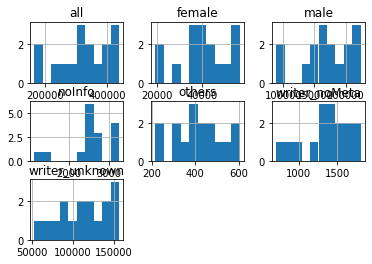

In [15]:
# just to vizualise a bit ... realy bad graph !!
fig = df_count.iloc[:16].hist()

### control max month in 2020 because week17 to week53 are empty
run following code:
```
df_20 = pd.read_json(PATH_DATA+FILE_20, lines=True, compression='bz2', chunksize=CHUNK_SIZE)
max_month = -1
i = 0
begin = time()
for chunk in df_20:
    chunk['month'] = get_month(chunk, 'quoteID').astype(int)
    month = chunk.month.max()
    if month>max_month:
        max_month = month
    i += 1

print(f'max month in 2020 is: {max_month}, found in {(time()-begin):.2f} [s]')
```
> output is **4** (takes about 5 \[min\])

---
# Strange things:
---
### Writer with many genders :
Some writer have more than one gender
```python
df_parquet.iloc[2275550].gender
```
> [Q6581072](https://www.wikidata.org/wiki/Q6581072) and [Q48270](https://www.wikidata.org/wiki/Q48270) : _femal_ and _non-binary_

---
### writer not repertiored:
get writer QID from \[writer_noMeta\] and input it in \[df_parquet\] as follow:
``` python
i = 0
df_parquet[df_parquet.id == writer_noMeta.iloc[i].values[0]]
```
> should return an empty DataFrame

Exemple:\
i = 0 : [entity](https://www.wikidata.org/wiki/Q59209387) does not exist\
i = 1 : [Philippe Bouyer](https://www.wikidata.org/wiki/Q30337200)

---
### gender not described:
get writer QID from \[gender_noInfo\] and input it in \[df_qid\] as follow:
``` python
i = 0
df_qid[df_qid.QID == writer_noInfo.iloc[i].values[0]]
```
> should return an empty DataFrame

Exemple:\
i = 0 : [entity](https://www.wikidata.org/wiki/Q59209387) does not exist\
i = 1 : [Philippe Bouyer](https://www.wikidata.org/wiki/Q30337200)

df_parquet[df_parquet.id == 'Q23008875'] : 

'''

df_parquet[df_parquet.gender.equals(['Q15145782'])]

print(writer_noInfo, '\n') # search : https://www.wikidata.org/wiki/Q1175256 : gives "David Lindenmayer"
df_parquet[df_parquet.id.isin(writer_noInfo)] # control if parquet contains writer_noInfo values in id -> Empty DataFrame -> OK
gender_noInfo
writer_noInfo
parquet_gender_qidsm

In [16]:
q_gender_no_meta

,week,qids
5200094,4,Q35538997
5200150,4,Q21459612
5200210,4,Q58427075
5200567,8,Q46157982
5200642,8,Q56895957
...,...,...
5243708,12,Q58449308
5243819,11,Q53509853
5244157,10,Q59052593
5244210,4,Q41804474
